In [1]:
import os
import csv
import scipy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iSCAMS_class import iSCAMS
from astroML.plotting import hist

In [6]:
Path = r"./Contrasts/Actin/"
Filenames = []
for filename in os.listdir(Path):
    filename_sample = os.path.join(os.path.expanduser(Path),filename)
    assert os.path.exists(filename_sample)
    Filenames.append(filename_sample)
Filenames = Filenames[0:-1]
print("Standard Files:",Filenames)

Standard Files: ['./Contrasts/Actin/Actin_Baseline_200nM_Cf.npy', './Contrasts/Actin/DRP1_250nM_Cf.npy', './Contrasts/Actin/DRP1_GDP_1_250nM_Cf.npy', './Contrasts/Actin/DRP1_GDP_250nM_Cf.npy', './Contrasts/Actin/DRP1_GDP_2_250nM_Cf.npy', './Contrasts/Actin/DRP1_GMP-PCP_1_250nM_Cf.npy', './Contrasts/Actin/DRP1_GMP-PCP_2_250nM_Cf.npy', './Contrasts/Actin/DRP1_GMP-PCP_3_250nM_Cf.npy']


In [7]:
Nuc = ["Actin","GDP","GDP2","GDP3","GMP-PCP","GMP-PCP2","GMP-PCP3"]
n = np.arange(len(Filenames))
variables = []
for x,i in zip(Nuc,n):
    Cf = np.load(Filenames[i])
    globals()['DRP1_%s' % x] = iSCAMS(Cf,Conc="250nM",Protein="DRP1",Buffer="HEPES",Mass=False,c_range=(0.0,0.04))
    variables.append('DRP1_%s' % x)
    

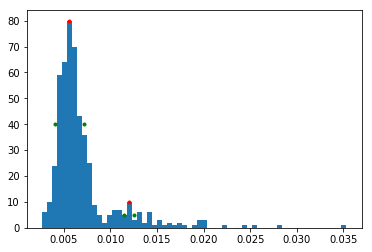

C:\Users\pkgroup\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


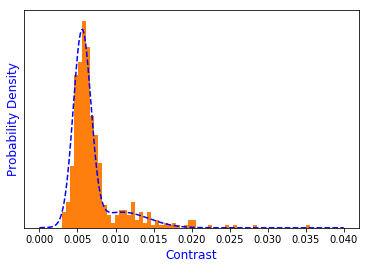

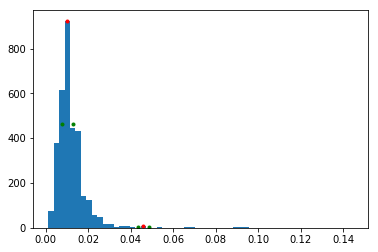

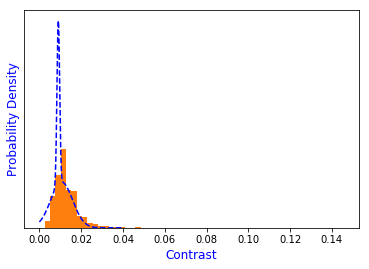

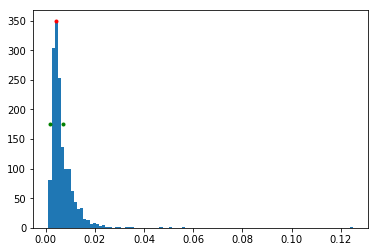

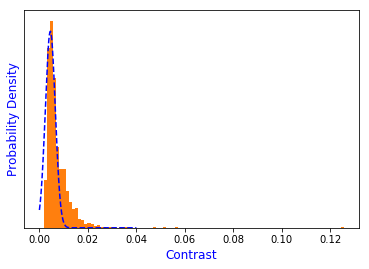

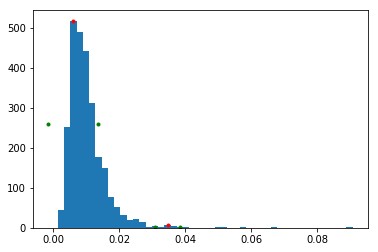

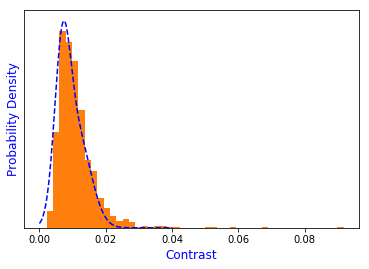

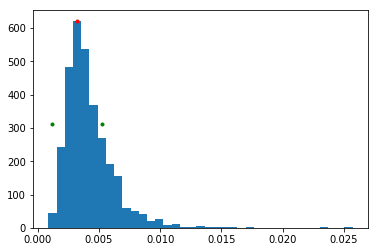

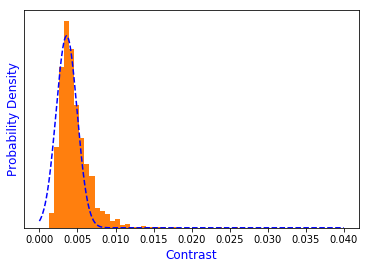

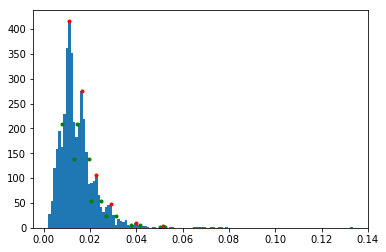

Error - curve_fit failed, re-running Auto_Gauss


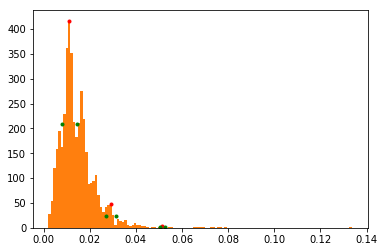

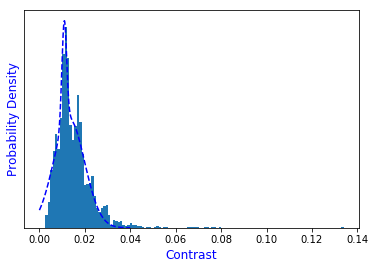

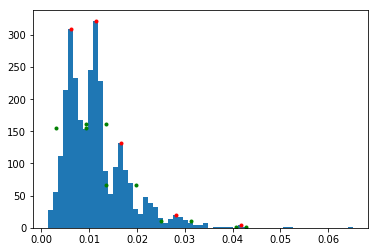

Error - curve_fit failed, re-running Auto_Gauss


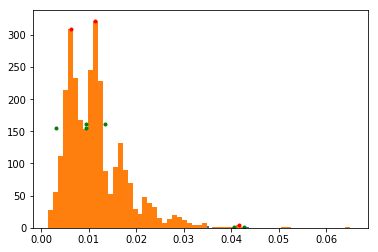

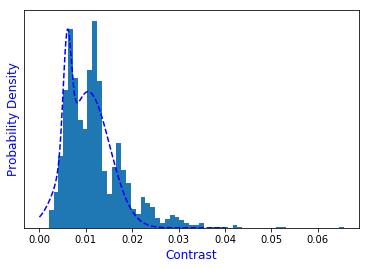

In [8]:
for var in variables:
    globals()[var].Auto_Gauss()
    globals()[var].Fit_Gaussian()

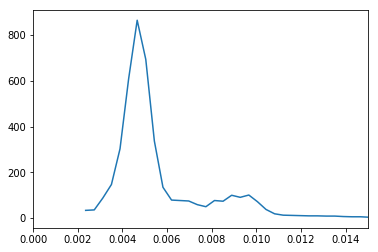

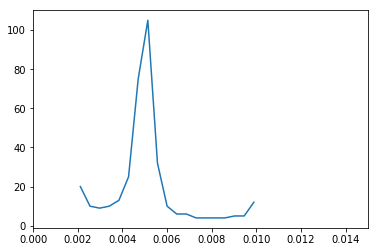

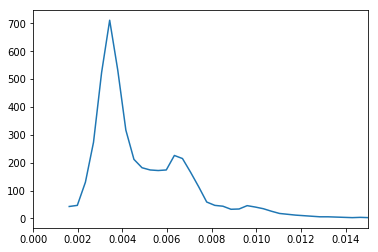

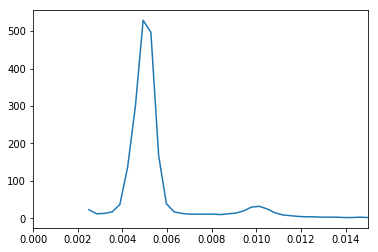

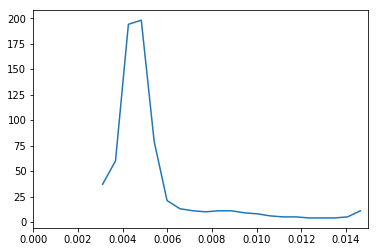

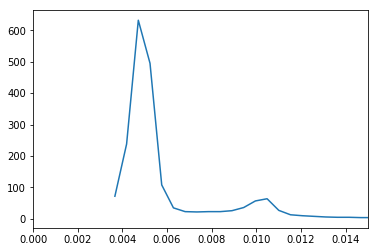

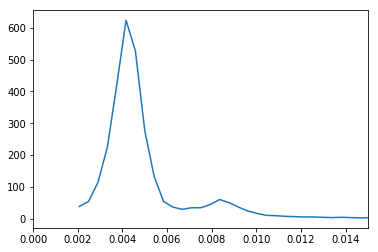

In [45]:
for var in variables:
    globals()[var].GaussKernel(sigma=20)
    plt.figure()
    n,bins,p = hist(globals()[var].contrast_smooth,bins="knuth")
    plt.clf()
    plt.plot(bins[:-1],n)
    plt.xlim(0.0,0.015)
    plt.show()

[0.00519896 0.00480788 0.00321954 ... 0.00497417 0.00370947 0.00509007]
